In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [141]:
from google.colab import files
uploaded = files.upload()

Saving DATA USED.csv to DATA USED (3).csv


In [142]:
import io
df= pd.read_csv(io.BytesIO(uploaded['DATA USED.csv']))
# Dataset is now stored in a Pandas Dataframe

In [143]:
df

,year,POPGROWTH,CDR,CBR,GDP
0,1989,3.082181,14.897,44.304,3.764443
1,1990,3.193235,14.914,43.986,7.045072
2,1991,3.327461,14.951,43.642,2.071988
3,1992,3.412766,14.999,43.285,0.584322
4,1993,3.376900,15.043,42.930,1.205801
5,1994,3.195217,15.068,42.592,1.567662
6,1995,2.931260,15.050,42.289,3.569912
7,1996,2.647339,14.963,42.041,4.544367
8,1997,2.428289,14.796,41.854,3.525278
9,1998,2.317538,14.544,41.730,3.708512


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       32 non-null     int64  
 1   POPGROWTH  32 non-null     float64
 2   CDR        32 non-null     float64
 3   CBR        32 non-null     float64
 4   GDP        32 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


In [145]:
df.describe()

,year,POPGROWTH,CDR,CBR,GDP
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2004.500000,2.892695,11.309969,40.721156,5.160088
std,9.380832,0.267344,3.310622,2.303159,2.011750
min,1989.000000,2.317538,6.122000,35.981000,0.584322
25%,1996.750000,2.812112,8.200500,39.139000,3.750460
50%,2004.500000,2.934019,11.720500,41.655500,5.743208
75%,2012.250000,2.998448,14.821250,41.900750,6.771798
max,2020.000000,3.412766,15.068000,44.304000,7.672155


**CORRELATION**

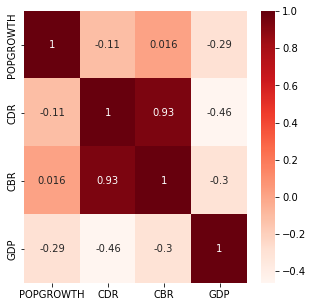

In [146]:
df1 = df[['POPGROWTH','CDR', 'CBR', 'GDP']]
plt.figure(figsize=(5,5))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


CDR and CBR are highly positive correlated (0.93)

**OUTLIER DETECTION**

In [147]:
numerical_continuous = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove('year')
numerical_continuous

['POPGROWTH', 'CDR', 'CBR', 'GDP']

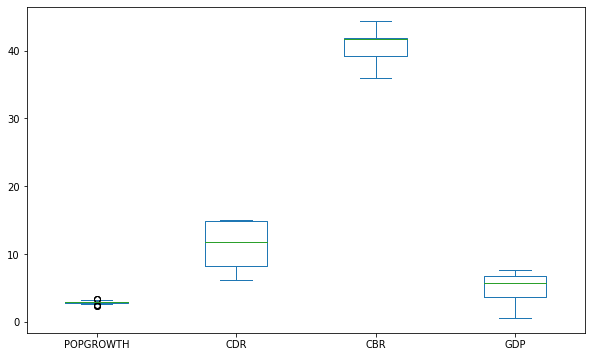

In [150]:
df[numerical_continuous].plot(kind = 'box', figsize = (10, 6))

The varibles have no outliers

**SHAPIRO-WILKS TEST OF NORMALITY**

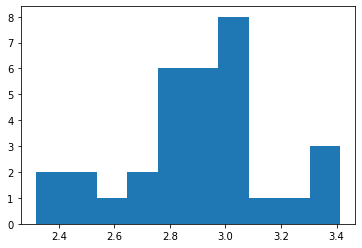

In [125]:
from matplotlib import pyplot as plt

plt.hist(df['POPGROWTH'])
plt.show()

In [126]:
from scipy.stats import shapiro

result = (shapiro(df['POPGROWTH']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.9512178301811218
p-value: 0.1560593843460083


Given the large p-value (0.156) which is greater than 0.05 (>0.05), we fail to reject the null hypothesis and conclude that the sample sample is not significantly different from a normal distribution.

In [127]:
from scipy.stats import shapiro

result = (shapiro(df['CBR']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.914978563785553
p-value: 0.015229200012981892


In [128]:
from scipy.stats import shapiro

result = (shapiro(df['CDR']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.8726509809494019
p-value: 0.0013373889960348606


In [129]:
from scipy.stats import shapiro

result = (shapiro(df['GDP']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.9041619896888733
p-value: 0.007917658425867558


We tested normality of the variables using Shapiro- wilks test<br>
HYPOTHESIS<br>
The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05<br>
CONCLUSION<br>
The data is not Gaussian

In [9]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 2.1 MB/s 
     |████████████████████████████████| 9.8 MB 16.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=bcc94b1a225d363582f4ed4cbf2cfd7b4419ccb0daee3365c06b8397e5ff9b78
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=fc3120f0652ee18a5a28b12d7afbabb7c6fc2e883c3d326c57badb6abdc808ab
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


**MULTIVARIATE NORMALITY**


In [130]:
import pingouin as pg
from pingouin import multivariate_normality
multivariate_normality(df1, alpha=.05)

HZResults(hz=1.9187105398190027, pval=1.2373778608141404e-11, normal=False)

Since the p-value is less than the alpha(0.05) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a multivariate normal distribution.

**Checking the Homogeneity of Variances Assumption**

In [131]:
pg.homoscedasticity(df1, method ="bartlett")

,T,pval,equal_var
bartlett,112.912513,2.590996e-24,False


The variances are NOT equal<BR>
The p-value from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance.

Thus, the assumption of equal variances is violated and we can proceed to perform Welch’s ANOVA.

In [132]:
GDP_column = df['GDP'].tolist()
CDR_column = df['CDR'].tolist()
CBR_column = df['CBR'].tolist()
POPGROWTH_column = df['POPGROWTH'].tolist()

In [133]:
import scipy.stats as stats

#perform Bartlett's test 
stats.bartlett(GDP_column, CDR_column, CBR_column, POPGROWTH_column)

BartlettResult(statistic=112.91251343472794, pvalue=2.590996285536891e-24)

In [134]:
import pingouin as pg
import pandas as pd
import numpy as np

#create DataFrame
df = pd.DataFrame({'OBS': [3.764443407, 7.045071644, 2.071988211, 0.584322134, 1.205800808, 1.567661766, 3.569911868, 4.544366802, 3.525278191, 3.708511596, 4.863863755, 4.520784635, 6.070808288, 7.093194984, 6.672789829, 7.50381466, 7.476319258, 6.53222139, 6.768535202, 5.68641686, 5.269105248, 6.336523427, 7.672155435, 4.50015356, 6.781585601, 6.732461868, 6.160628774, 6.867116196, 6.785680114, 5.444967601, 5.799999977, 1.996343506,
                             14.897, 14.914, 14.951, 14.999, 15.043, 15.068, 15.05, 14.963, 14.796, 14.544, 14.211, 13.808, 13.356, 12.882, 12.408, 11.945, 11.496, 11.053, 10.605, 10.146, 9.68, 9.212, 8.751, 8.305, 7.887, 7.503, 7.161, 6.868, 6.622, 6.419, 6.254, 6.122,
                             44.304, 43.986, 43.642, 43.285, 42.93, 42.592, 42.289, 42.041, 41.854, 41.73, 41.663, 41.648, 41.673, 41.718, 41.755, 41.764, 41.716, 41.587, 41.371, 41.071, 40.693, 40.249, 39.763, 39.262, 38.77, 38.302, 37.866, 37.461, 37.075, 36.7, 36.336, 35.981,
                             3.082181125, 3.193235329, 3.327460565, 3.412765688, 3.376900183, 3.195216588, 2.931260372, 2.647339411, 2.428288872, 2.317537614, 2.34674369, 2.468906027, 2.61242421, 2.722291754, 2.798988535, 2.827162562, 2.823755446, 2.816486775, 2.823941465, 2.8414655, 2.872958629, 2.911888941, 2.948418936, 2.97566284, 2.994061634, 3.001801057, 3.001067041, 2.997574458, 2.991812303, 2.97948066, 2.960386246, 2.936777704],
                   'group': np.repeat(['GDP_column', 'CDR_column', 'CBR_column', 'POPGROWTH_column'], repeats=32)}) 

#perform Welch's ANOVA
pg.welch_anova(dv='OBS', between='group', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,3,52.914794,2835.983378,2.116866e-58,0.978956


The overall p-value from the ANOVA table is less than α = .05, which means we can reject the null hypothesis that the variables(CBR, CDR, POPGROWTH AND GDP) are equal between the variables<br>

So The mean of all the groups are significantly different.We can then perform the Games-Howell post-hoc test to determine exactly which group means are different:

In [135]:
pg.pairwise_gameshowell(dv='OBS', between='group', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,CBR_column,CDR_column,40.721156,11.309969,29.411188,0.712933,41.253780,55.312038,1.576517e-14,10.188180
1,CBR_column,GDP_column,40.721156,5.160088,35.561068,0.540592,65.781693,60.899017,0.000000e+00,16.245681
2,CBR_column,POPGROWTH_column,40.721156,2.892695,37.828461,0.409879,92.291887,31.835228,0.000000e+00,22.792733
3,CDR_column,GDP_column,11.309969,5.160088,6.149880,0.684821,8.980274,51.146888,2.576794e-11,2.217800
4,CDR_column,POPGROWTH_column,11.309969,2.892695,8.417274,0.587146,14.335914,31.404291,1.953993e-14,3.540448
5,GDP_column,POPGROWTH_column,5.160088,2.892695,2.267393,0.358757,6.320138,32.094582,2.472150e-06,1.560844
